# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [25]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [27]:
# Your code here
df = pd.read_csv('data/ames.csv', index_col=0) 
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


The following code checks that you loaded the data correctly:

In [30]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [32]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [34]:
# Run this cell without changes

df.keys()

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

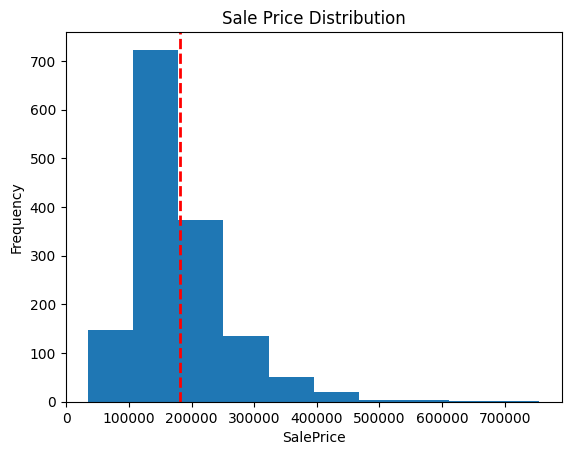

In [38]:
# Your code here
df['SalePrice'].plot.hist()

plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Sale Price Distribution')
plt.axvline(df['SalePrice'].mean(), color='red',linestyle='dashed',linewidth=2)
plt.show()

Now, print out the mean, median, and standard deviation:

In [42]:
# Your code goes here
mean_SalePrice = df['SalePrice'].mean()
print(mean_SalePrice)

#median
median_SalePrice = df['SalePrice'].median()
print(median_SalePrice)

#standard devaition
std_SalePrice = df['SalePrice'].std()
print(std_SalePrice)


180921.19589041095
163000.0
79442.50288288662


In the cell below, interpret the above information.

In [44]:
# Replace None with appropriate text
"""
- There are more sales below the mean price than those above 
- Peak sales are between 100k and 250k
- Most sale prices tend to be lower but with outliers well above 500k seeming to even influence the mean
with the mean sale price being higher than than the median

"""

'\n- There are more sales below the mean price than those above \n- Peak sales are between 100k and 250k\n- Most sale prices tend to be lower but with outliers well above 500k seeming to even influence the mean\nwith the mean sale price being higher than than the median\n\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

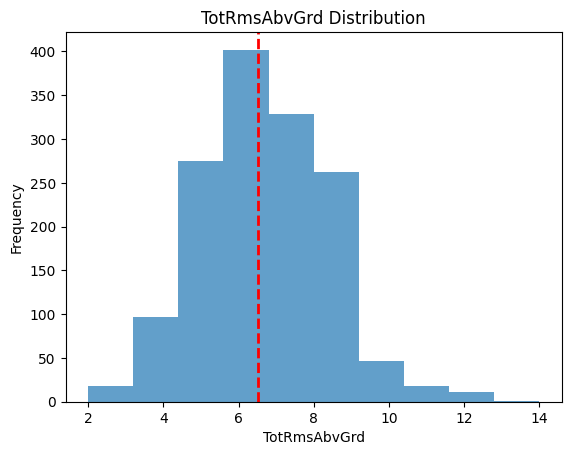

In [46]:
# Your code here
df['TotRmsAbvGrd'].plot.hist(alpha=0.7)

plt.xlabel('TotRmsAbvGrd')
plt.ylabel('Frequency')
plt.title('TotRmsAbvGrd Distribution')
plt.axvline(df['TotRmsAbvGrd'].mean(), color='red',linestyle='dashed',linewidth=2)
plt.show()

Now, print out the mean, median, and standard deviation:

In [48]:
# Your code here
mean_TotRmsAbvGrd = df['TotRmsAbvGrd'].mean()
print(mean_TotRmsAbvGrd)

#median
median_TotRmsAbvGrd = df['TotRmsAbvGrd'].median()
print(median_TotRmsAbvGrd)

#standard devaition
std_TotRmsAbvGrd = df['TotRmsAbvGrd'].std()
print(std_TotRmsAbvGrd)


6.517808219178082
6.0
1.6253932905840505


In the cell below, interpret the above information.

In [51]:
# Replace None with appropriate text
"""
- The shape of the graph seems to show normal distribution 
- Majority of the houses seem to have betwee 5 to 7 rooms above ground 
- The mean and the median are pretty close showing very little skew but the 
"""

'\n- The shape of the graph seems to show normal distribution \n- Majority of the houses seem to have betwee 5 to 7 rooms above ground \n- The mean and the median are pretty close showing very little skew but the \n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

In [55]:
df['OverallCond']

Id
1       5
2       8
3       5
4       5
5       5
       ..
1456    5
1457    6
1458    9
1459    6
1460    6
Name: OverallCond, Length: 1460, dtype: int64

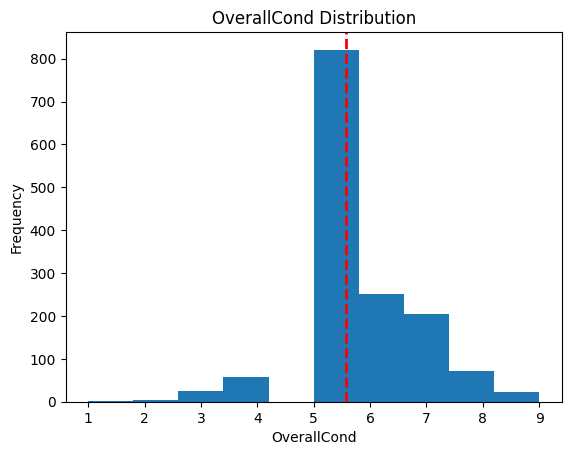

In [58]:
# Your code here
df['OverallCond'].plot.hist()

plt.xlabel('OverallCond')
plt.ylabel('Frequency')
plt.title('OverallCond Distribution')
plt.axvline(df['OverallCond'].mean(), color='red',linestyle='dashed',linewidth=2)
plt.show()


Now, print out the mean, median, and standard deviation:

In [61]:
# Your code here
mean_OverallCond = df['OverallCond'].mean()
print(mean_OverallCond)

#median
median_OverallCond = df['OverallCond'].median()
print(median_OverallCond)

#standard devaition
std_OverallCond = df['OverallCond'].std()
print(std_OverallCond)

5.575342465753424
5.0
1.1127993367127316


In the cell below, interpret the above information.

In [64]:
# Replace None with appropriate text
"""
- The graph is heavily centered around 5-6 meaning that most houses are of average condition
 Very few homes rated below 4 and above 8
 - the mean and median ar early identical, the distribution is symetrical with very little skew
 - There is limited variation 
"""

'\n- The graph is heavily centered around 5-6 meaning that most houses are of average condition\n Very few homes rated below 4 and above 8\n - the mean and median ar early identical, the distribution is symetrical with very little skew\n - There is limited variation \n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [68]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition =  df[df['OverallCond'] == 5]
above_average_condition =  df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [71]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

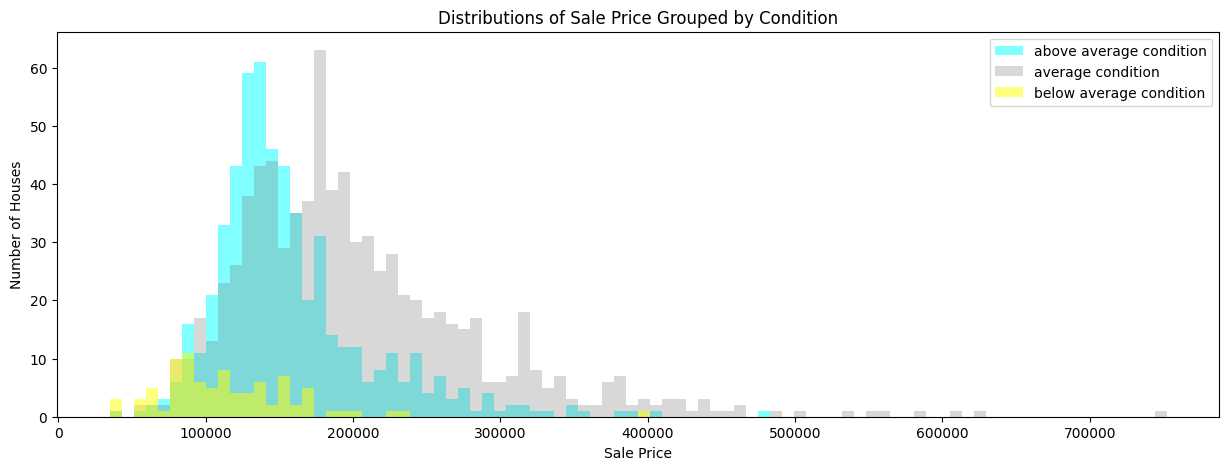

In [74]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [77]:
# Replace None with appropriate text
"""
General Trend 
- Sales of above average houses seem to peak between 100,000 and 200,000
- Sales of average huses seem to peak between 150,000 and 300,000
- Average houses seem to dominate the market
- The sales of below average houses generally seem low, with far fewer units sold in general and negligile units above 200,000
- Suprising to note average houses costing well above 500,000 and barely any above average houses costinng this ranges

There seems to be other factors at play determning the cost of houses other than general ondition based on this trends
Possibly neighborhoods, the size of the homes more. This cannot be derived only from this subset of the data set
"""

'\nGeneral Trend \n- Sales of above average houses seem to peak between 100,000 and 200,000\n- Sales of average huses seem to peak between 150,000 and 300,000\n- Average houses seem to dominate the market\n- The sales of below average houses generally seem low, with far fewer units sold in general and negligile units above 200,000\n- Suprising to note average houses costing well above 500,000 and barely any above average houses costinng this ranges\n\nThere seems to be other factors at play determning the cost of houses other than general ondition based on this trends\nPossibly neighborhoods, the size of the homes more. This cannot be derived only from this subset of the data set\n'

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [79]:
# Your code here
# getting the columns in  df with numric data type
numeric_df = df.select_dtypes(include=['number'])

# getting the pearson correlates
saleprice_correlate = numeric_df.corr()['SalePrice']

#getting the most positively correlated column
sorted_correlates = saleprice_correlate.drop('SalePrice').sort_values(ascending=False)
print(f"The most positively correlated", sorted_correlates.head(1))


The most positively correlated OverallQual    0.790982
Name: SalePrice, dtype: float64


Now, find the ***most negatively correlated*** column:

In [81]:
# Your code here
print(f"The  most negatively correlated", sorted_correlates.tail(1))

The  most negatively correlated KitchenAbvGr   -0.135907
Name: SalePrice, dtype: float64


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

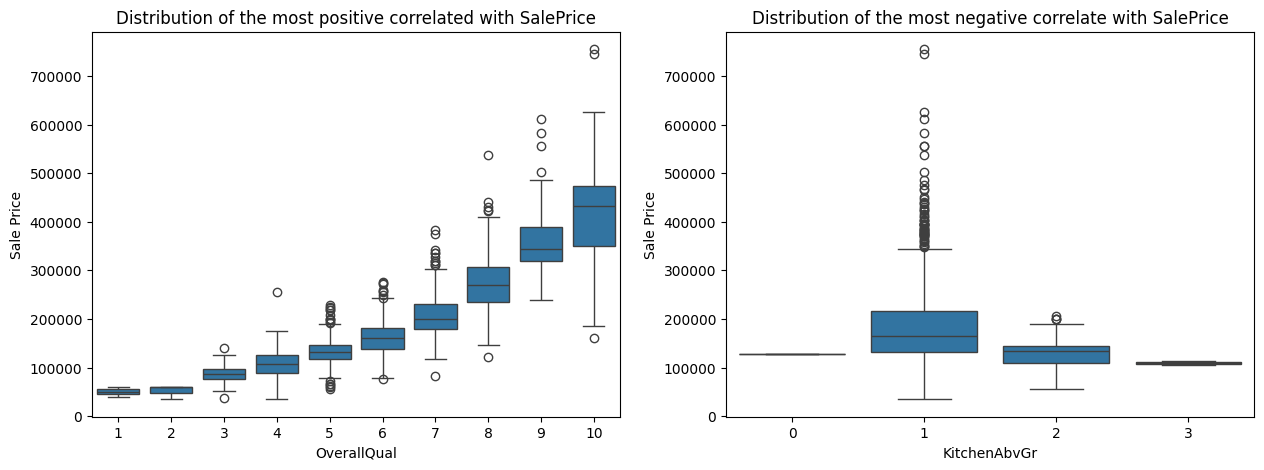

In [84]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df["OverallQual"],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df["KitchenAbvGr"],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("Distribution of the most positive correlated with SalePrice")
ax1.set_xlabel("OverallQual")
ax1.set_ylabel("Sale Price")
ax2.set_title("Distribution of the most negative correlate with SalePrice")
ax2.set_xlabel("KitchenAbvGr")
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [88]:
# Replace None with appropriate text
"""
Positevely Correlated chart
- Overall increase in quality the median sal price goes up
- There seems to be an overall increase in the spread of pricing for houses with quality rating above 8
- Lower quality houses are consistently low with little variabilit in pricing 
- there are outlier across the board bt more for the higher quality houses 

Negatively correlated chart
- The overall sale prices tend to be much lower for houses with more kitchen above ground 
with most buyers clustered to houses with one kitchen. Less variability with more kitchens 
- House with 1 kitchen show a great deal of variabiliy in pricing with some hig value homes well over 600k
- It is clear that more kitchens may be an indicator to buyers of lower quality houses or poor design 
- Overall buyers prefer less kitchens
"""

'\nPositevely Correlated chart\n- Overall increase in quality the median sal price goes up\n- There seems to be an overall increase in the spread of pricing for houses with quality rating above 8\n- Lower quality houses are consistently low with little variabilit in pricing \n- there are outlier across the board bt more for the higher quality houses \n\nNegatively correlated chart\n- The overall sale prices tend to be much lower for houses with more kitchen above ground \nwith most buyers clustered to houses with one kitchen. Less variability with more kitchens \n- House with 1 kitchen show a great deal of variabiliy in pricing with some hig value homes well over 600k\n- It is clear that more kitchens may be an indicator to buyers of lower quality houses or poor design \n- Overall buyers prefer less kitchens\n'

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [91]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

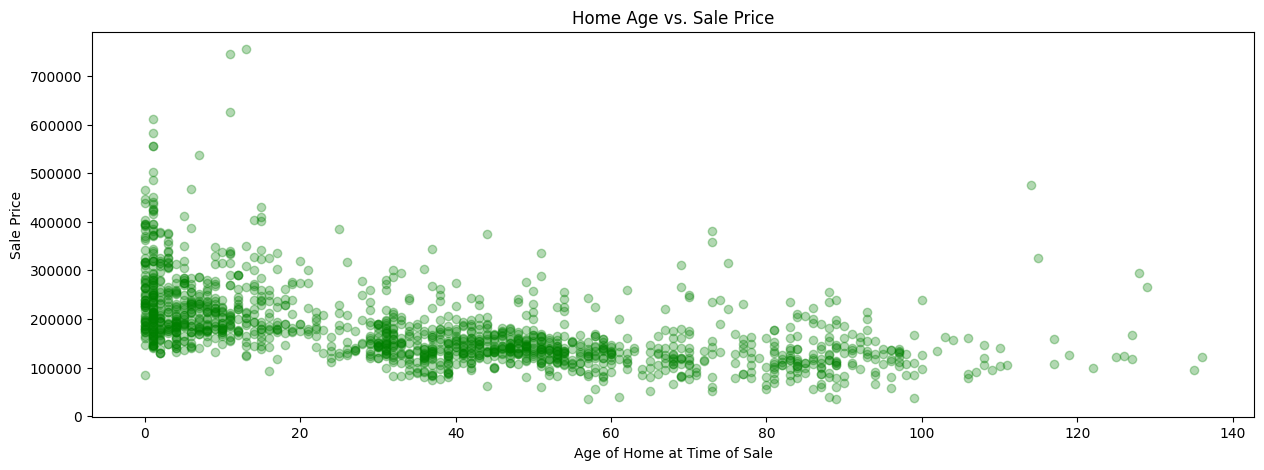

In [93]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [97]:
# Replace None with appropriate text
"""
- Sale prices tend to be lower with older houses
- Ther is however much less variabillity in prices for houses older than 40 with houses tending to lower than 300k. seems to show a great deal
of price stability for older homes 
- Most of the high valued houses tend to be lower than 20years
- There is more variability in the prices for newer house, with some outliers costing higher than 700k whereas there is cluster of new 
houses costing below 100k. Showing that there are other facters at play here other than age, possibly location, quality of builds
- There are however some outliers with really old houses over 100years costing in the 500k range 
"""

'\n- Sale prices tend to be lower with older houses\n- Ther is however much less variabillity in prices for houses older than 40 with houses tending to lower than 300k. seems to show a great deal\nof price stability for older homes \n- Most of the high valued houses tend to be lower than 20years\n- There is more variability in the prices for newer house, with some outliers costing higher than 700k whereas there is cluster of new \nhouses costing below 100k. Showing that there are other facters at play here other than age, possibly location, quality of builds\n- There are however some outliers with really old houses over 100years costing in the 500k range \n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.